<a href="https://colab.research.google.com/github/shahchhatru/Computer_vision_projects/blob/main/OpencvDrawing%26Transformation_rotation_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Drawing images and shapes using OpenCV**

Firsty, let's import OpenCV and numpy and define our imshow function

**References**
[GeeksForGeeks](!https://www.geeksforgeeks.org/python-opencv-cv2-line-method/)



In [15]:
import os

In [ ]:
# Our Setup, Import Libaries, Create our Imshow Function and Download our Images
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function
def imshow(title = "Image", image = None, size = 10):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

Let's start off my making a blank square canvas

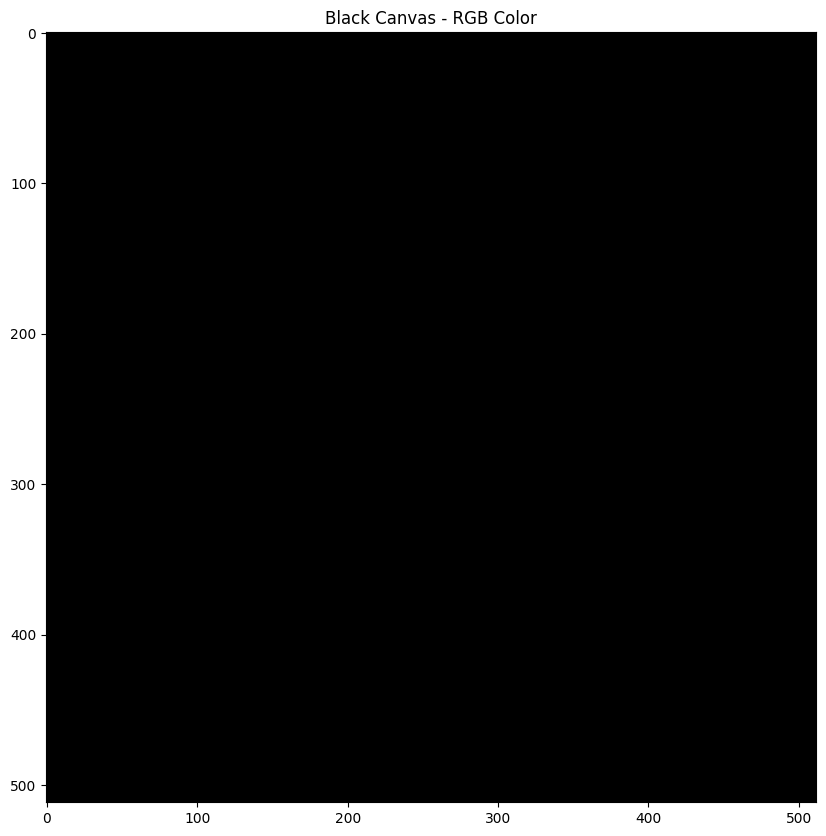

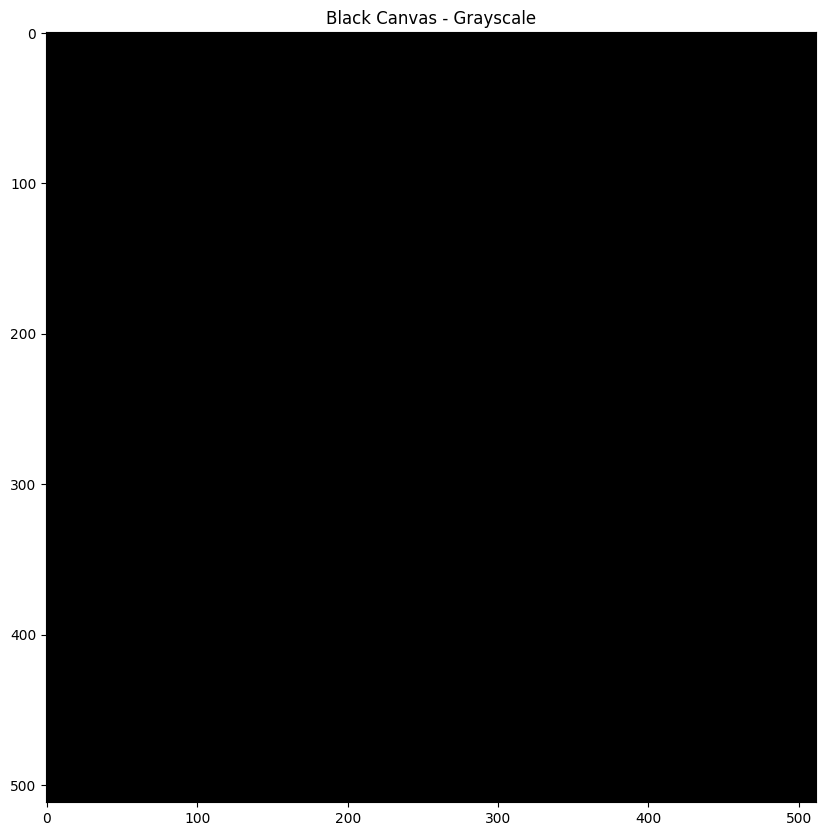

In [ ]:
# Create a black image using numpy to create and array of black
image = np.zeros((512,512,3), np.uint8)

# Can we make this in black and white? grayscale
image_gray = np.zeros((512,512), np.uint8)

# Black would be the same as a greyscale or color image (same for white)
imshow("Black Canvas - RGB Color", image)
imshow("Black Canvas - Grayscale", image_gray)

### **Let's draw a line over our black square**

```cv2.line(image, starting cordinates, ending cordinates, color, thickness)```

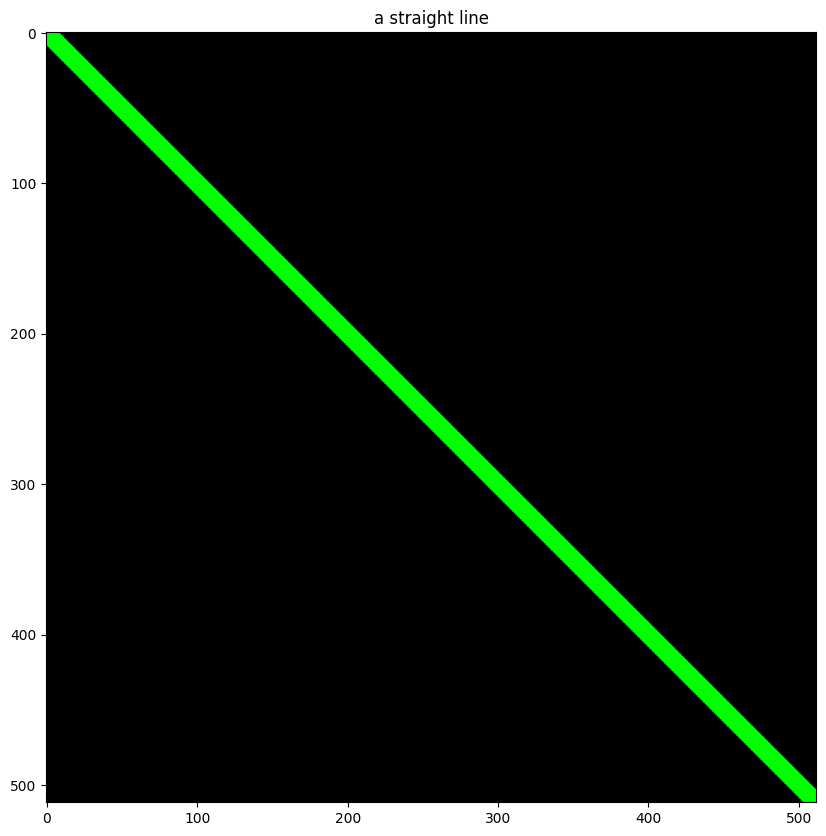

In [ ]:
cv2.line(image,(0,0),(511,511),(0,255,0),4)
imshow("a straight line",image)

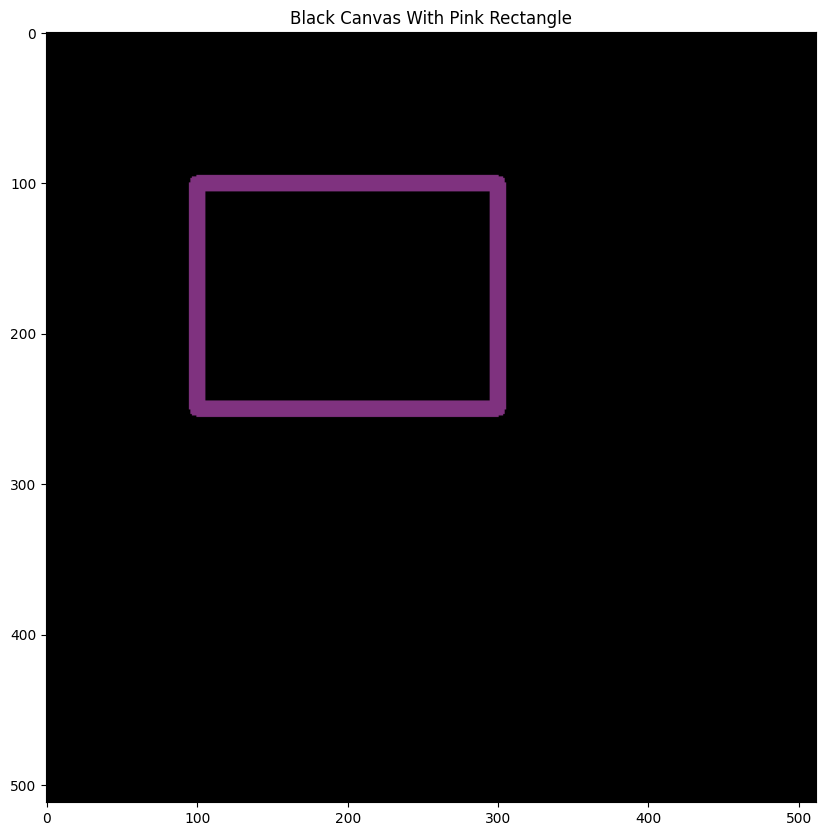

In [ ]:
# Create our black canvas again because now it has a line in it
image = np.zeros((512,512,3), np.uint8)

# Thickness - if positive. Negative thickness means that it is filled
cv2.rectangle(image, (100,100), (300,250), (127,50,127), 10)
imshow("Black Canvas With Pink Rectangle", image)

### **Now let's draw some cirlcles?**

```cv2.cirlce(image, center, radius, color, fill)```

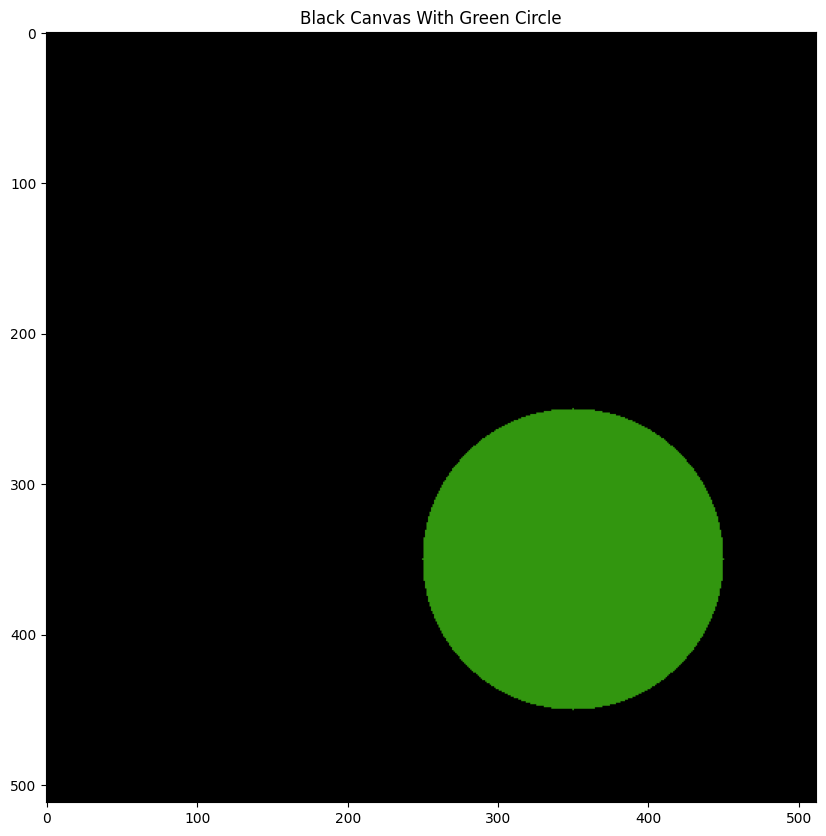

In [ ]:
image = np.zeros((512,512,3), np.uint8)

cv2.circle(image, (350, 350), 100, (15,150,50), -1)
imshow("Black Canvas With Green Circle", image)

### **Polygons**

```cv2.polylines(image, points, Closed?, color, thickness)```

if Closed = True, we join the first and last points.

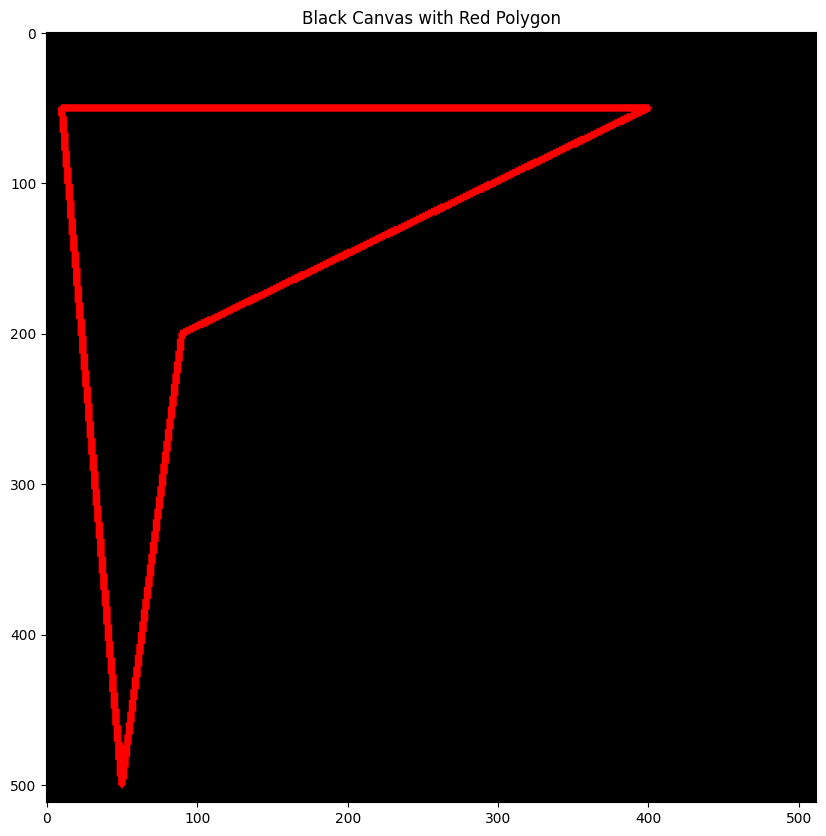

In [ ]:
image = np.zeros((512,512,3), np.uint8)

# Let's define four points
pts = np.array( [[10,50], [400,50], [90,200], [50,500]], np.int32)

# Let's now reshape our points in form  required by polylines
pts = pts.reshape((-1,1,2))

cv2.polylines(image, [pts], True, (0,0,255), 3)
imshow("Black Canvas with Red Polygon", image)

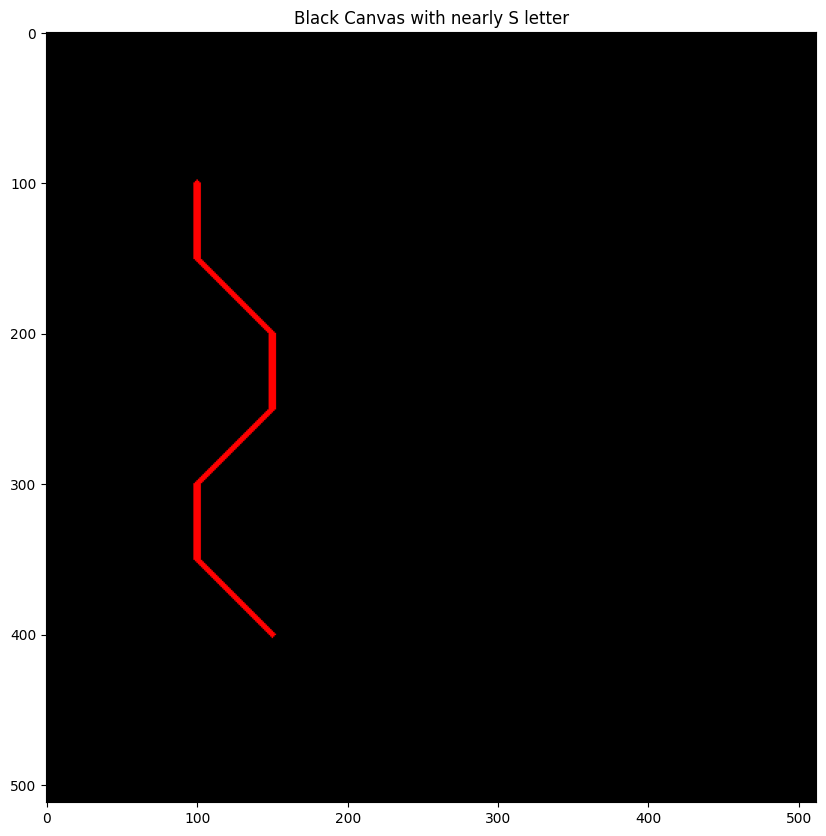

In [ ]:

# Create a black canvas
image = np.zeros((512,512,3), np.uint8)

# Define points for drawing an approximate 'S' letter
pts = np.array([[100,100], [100,150], [150,200], [150,250], [100,300], [100,350], [150,400]], np.int32)
pts = pts.reshape((-1,1,2))

# Draw the 'S' letter using polylines
cv2.polylines(image, [pts], False, (0,0,255), 3)

# Display the image
imshow("Black Canvas with nearly S letter", image)


### **And now for adding text with cv2.putText**

```cv2.putText(image, 'Text to Display', bottom left starting point, Font, Font Size, Color, Thickness)```

**Available Fonts**
- FONT_HERSHEY_SIMPLEX, FONT_HERSHEY_PLAIN
- FONT_HERSHEY_DUPLEX,FONT_HERSHEY_COMPLEX
- FONT_HERSHEY_TRIPLEX, FONT_HERSHEY_COMPLEX_SMALL
- FONT_HERSHEY_SCRIPT_SIMPLEX
- FONT_HERSHEY_SCRIPT_COMPLEX

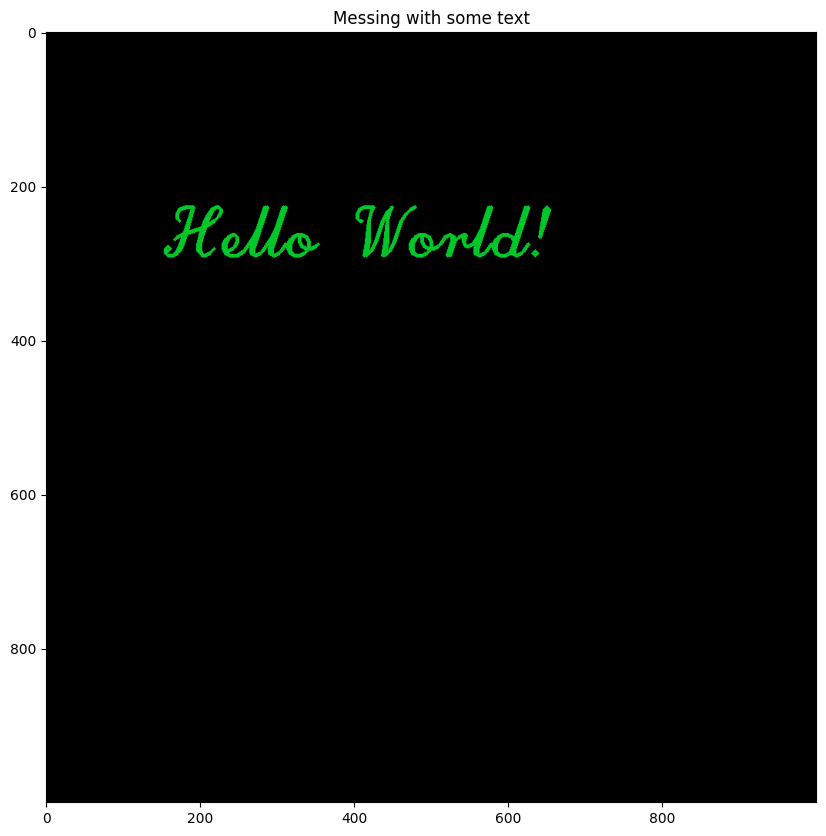

In [11]:
image = np.zeros((1000,1000,3), np.uint8)
ourString =  'Hello World!'
cv2.putText(image, ourString, (155,290), cv2.FONT_HERSHEY_SCRIPT_COMPLEX, 3, (40,200,0), 4)
imshow("Messing with some text", image)

In [12]:
import requests

def download_image(url, save_path):
    response = requests.get(url)
    if response.status_code == 200:
        with open(save_path, 'wb') as f:
            f.write(response.content)
        print(f"Image downloaded successfully and saved as {save_path}")
    else:
        print("Failed to download image")



In [13]:


image_url = 'https://plus.unsplash.com/premium_photo-1700583711916-3a5da557b4ac?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxlZGl0b3JpYWwtZmVlZHw3fHx8ZW58MHx8fHx8'  # Replace this with the actual image URL
save_path = 'downloaded_image.jpg'            # Specify the path where you want to save the image

download_image(image_url, save_path)

Image downloaded successfully and saved as downloaded_image.jpg


In [16]:
os.listdir()

['.config', 'downloaded_image.jpg', 'sample_data']

In [17]:
import glob
files=glob.glob("*.jpg")
files

['downloaded_image.jpg']

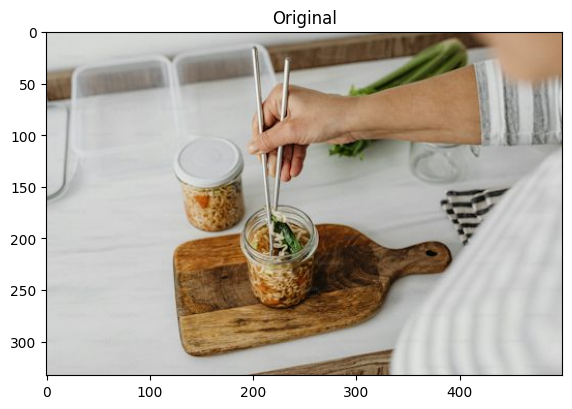

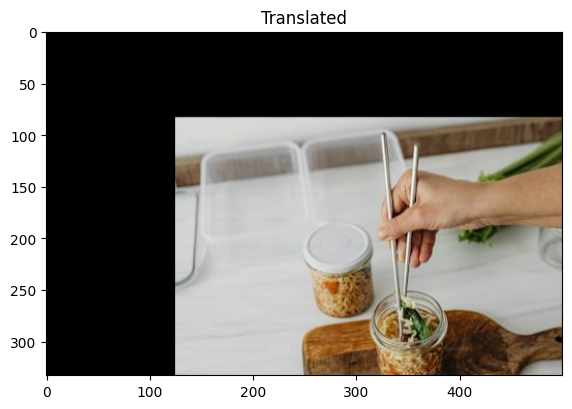

In [18]:
# Load our image
image = cv2.imread(files[0])
imshow("Original", image)

# Store height and width of the image
height, width = image.shape[:2]

# We shift it by quarter of the height and width
quarter_height, quarter_width = height/4, width/4

# Our Translation
#       | 1 0 Tx |
#  T  = | 0 1 Ty |

# T is our translation matrix
T = np.float32([[1, 0, quarter_width], [0, 1,quarter_height]])

# We use warpAffine to transform the image using the matrix, T
img_translation = cv2.warpAffine(image, T, (width, height))
imshow("Translated", img_translation)

In [19]:
# What does T look like
print(T)

print(height, width )

[[  1.     0.   125.  ]
 [  0.     1.    83.25]]
333 500


### **Rotations**

```cv2.getRotationMatrix2D(rotation_center_x, rotation_center_y, angle of rotation, scale)```

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/rotation.png)


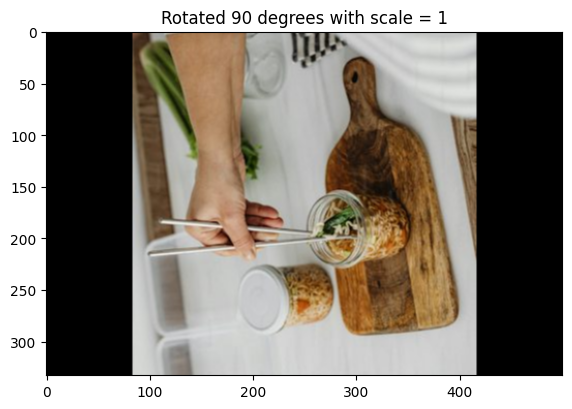

In [20]:
# Load our image
image = cv2.imread(files[0])
height, width = image.shape[:2]

# Divide by two to rototate the image around its centre
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 1)

# Input our image, the rotation matrix and our desired final width and height
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
imshow("Rotated 90 degrees with scale = 1", rotated_image)

[[ 3.061617e-17  5.000000e-01  1.667500e+02]
 [-5.000000e-01  3.061617e-17  2.915000e+02]]


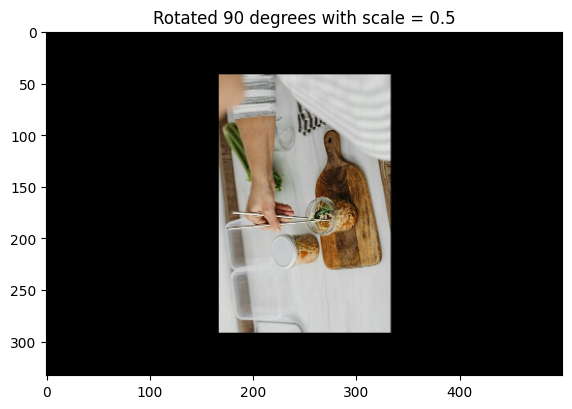

In [21]:
# Divide by two to rototate the image around its centre
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), 90, 0.5)
print(rotation_matrix)
# Input our image, the rotation matrix and our desired final width and height
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
imshow("Rotated 90 degrees with scale = 0.5", rotated_image)

Notice all the black space surrounding the image.

We could now crop the image as we can calculate it's new size (we haven't learned cropping yet!).

### **Rotations with cv2.transpose** (less flexible)




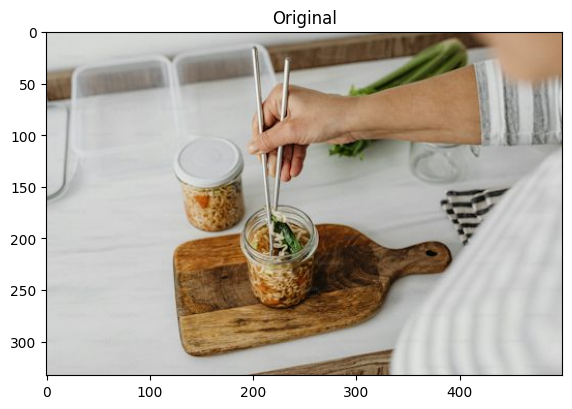

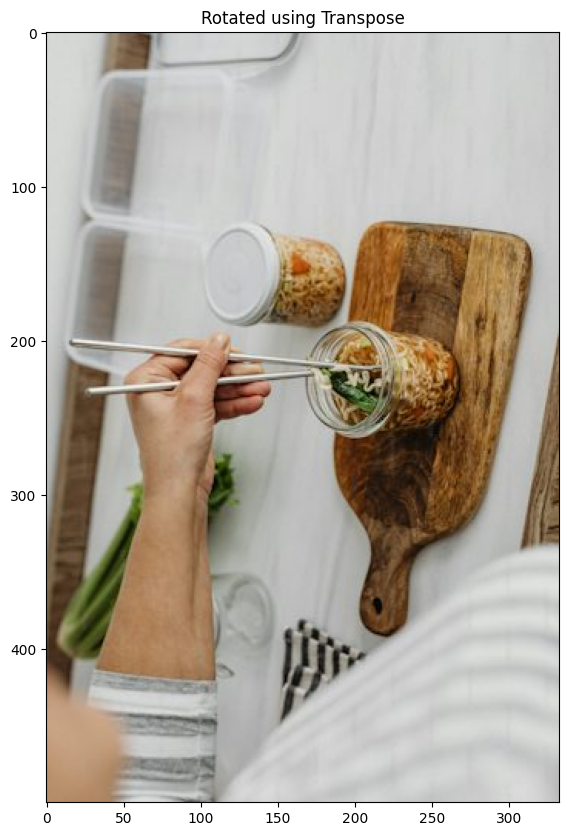

In [22]:
rotated_image = cv2.transpose(image)
imshow("Original", image)
imshow("Rotated using Transpose", rotated_image)

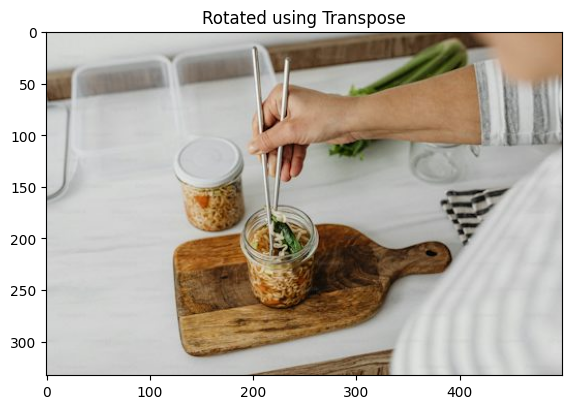

In [23]:
rotated_image = cv2.transpose(image)
rotated_image = cv2.transpose(rotated_image)

imshow("Rotated using Transpose", rotated_image)

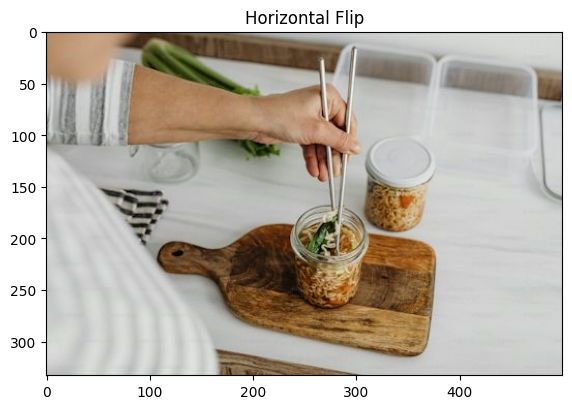

In [24]:
# Let's now to a horizontal flip.
flipped = cv2.flip(image, 1)
imshow("Horizontal Flip", flipped)

### **Re-sizing**

![](https://github.com/rajeevratan84/ModernComputerVision/raw/main/Resizing.png)

Re-sizing is a simple function that we execute using the cv2.resize function, it's arguments are:

```cv2.resize(image, dsize(output image size), x scale, y scale, interpolation)```
- if dsize is None the output image is calculated as a function of scaling using x & y scale

#### **List of Interpolation Methods:**
- cv2.INTER_AREA - Good for shrinking or down sampling
- cv2.INTER_NEAREST - Fastest
- cv2.INTER_LINEAR - Good for zooming or up sampling (default)
- cv2.INTER_CUBIC - Better
- cv2.INTER_LANCZOS4 - Best


### **Types of re-scaling Methods in OpenCV**

- **INTER_NEAREST** – a nearest-neighbor interpolation
- **INTER_LINEAR** – a bilinear interpolation (used by default)
- **INTER_AREA** – resampling using pixel area relation. It may be a preferred method for image decimation, as it gives moire’-free results. But when the image is zoomed, it is similar to theINTER_NEAREST method.
- **INTER_CUBIC** – a bicubic interpolation over 4×4 pixel neighborhood
- **INTER_LANCZOS4** – a Lanczos interpolation over 8×8 pixel neighborhood

See more on their performance - https://chadrick-kwag.net/cv2-resize-interpolation-methods/

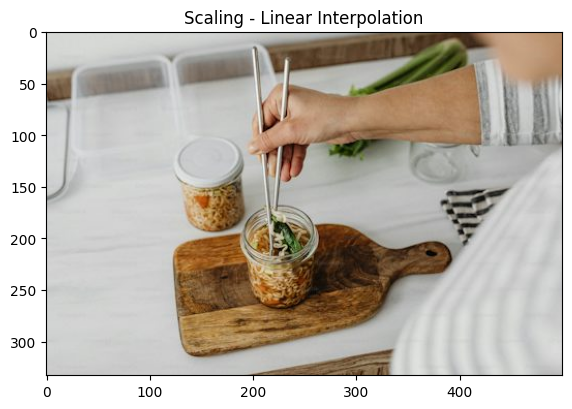

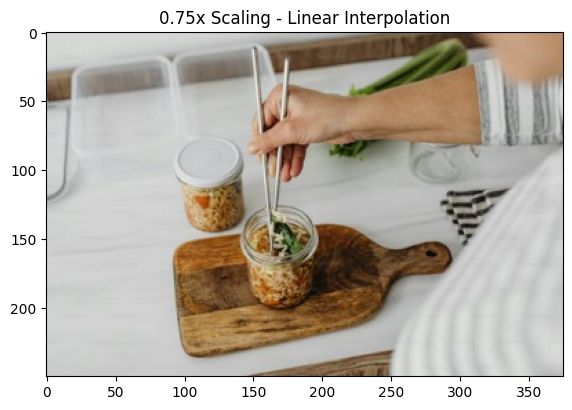

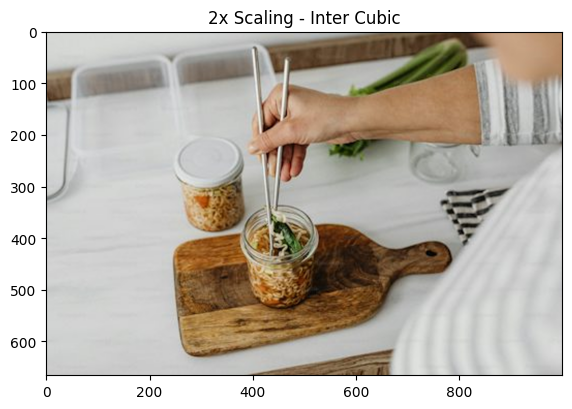

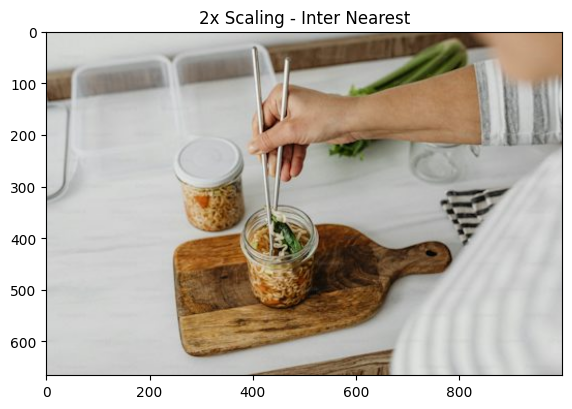

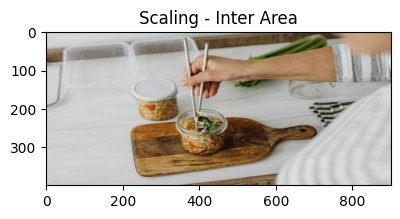

In [26]:
# load our input image
image = cv2.imread(files[0])
imshow("Scaling - Linear Interpolation", image)

# If no interpolation is specified cv.INTER_LINEAR is used as default
# Let's make our image 3/4 of it's original size
image_scaled = cv2.resize(image, None, fx=0.75, fy=0.75)
imshow("0.75x Scaling - Linear Interpolation", image_scaled)

# Let's double the size of our image
img_scaled2 = cv2.resize(image, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
imshow("2x Scaling - Inter Cubic", img_scaled2)

# Let's double the size of our image using inter_nearest interpolation
img_scaled3 = cv2.resize(image, None, fx=2, fy=2, interpolation = cv2.INTER_NEAREST)
imshow("2x Scaling - Inter Nearest", img_scaled3)

# Let's skew the re-sizing by setting exact dimensions
img_scaled4 = cv2.resize(image, (900, 400), interpolation = cv2.INTER_AREA)
imshow("Scaling - Inter Area", img_scaled4)

## **Image Pyraminds**

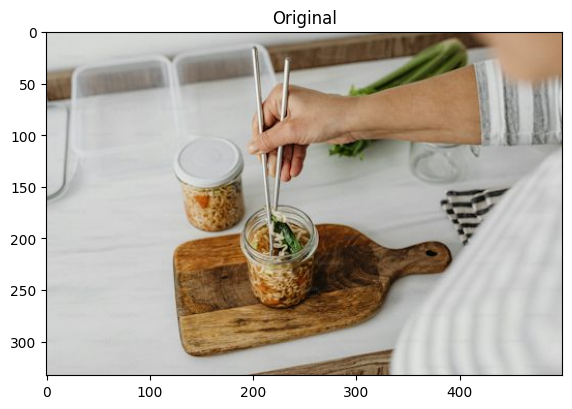

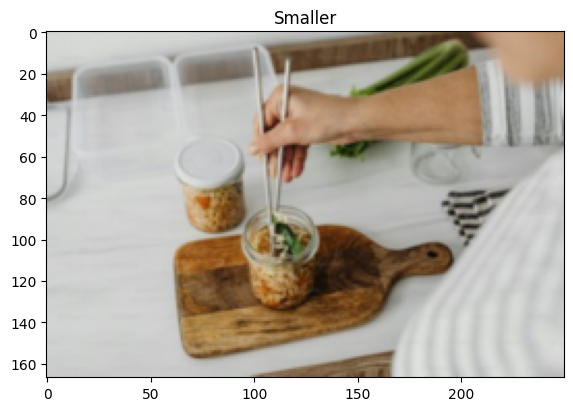

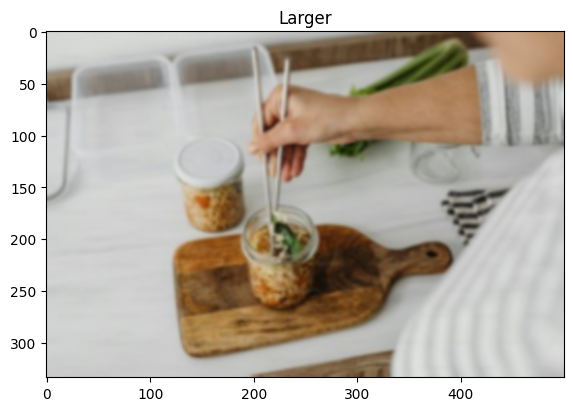

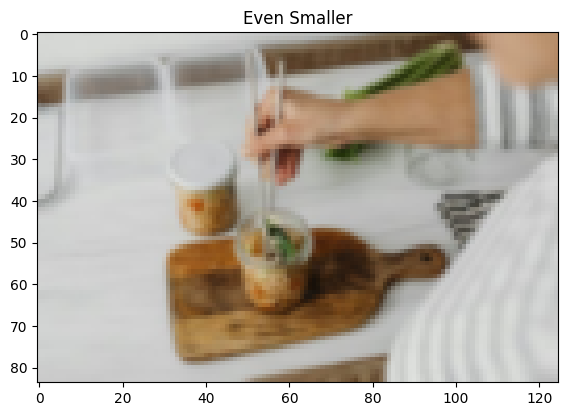

In [27]:
image = cv2.imread(files[0])

smaller = cv2.pyrDown(image)
larger = cv2.pyrUp(smaller)

imshow("Original", image)
imshow('Smaller', smaller)
imshow('Larger', larger)

even_smaller = cv2.pyrDown(smaller)
imshow('Even Smaller', even_smaller)

# **Cropping**

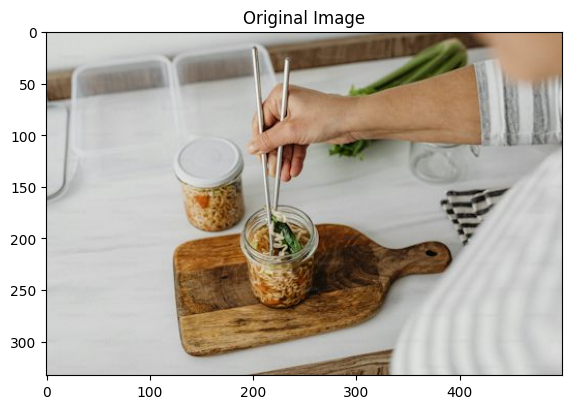

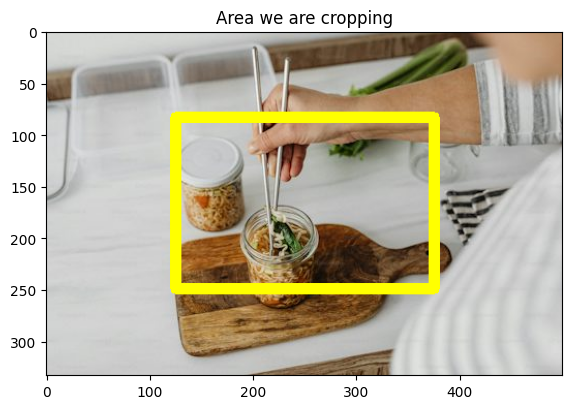

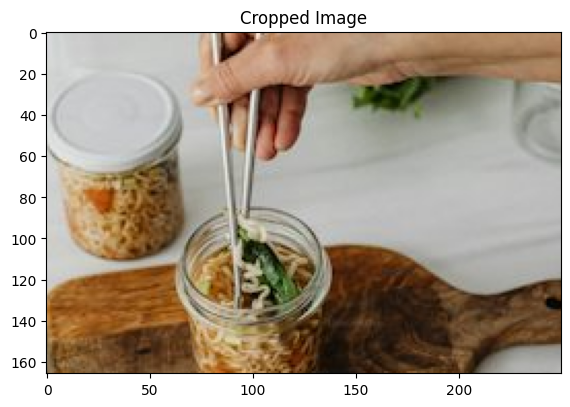

In [29]:
image = cv2.imread(files[0])

# Get our image dimensions
height, width = image.shape[:2]

# Let's get the starting pixel coordiantes (top  left of cropping rectangle)
# using 0.25 to get the x,y position that is 1/4 down from the top left (0,0)
start_row, start_col = int(height * .25), int(width * .25)

# Let's get the ending pixel coordinates (bottom right)
end_row, end_col = int(height * .75), int(width * .75)

# Simply use indexing to crop out the rectangle we desire
cropped = image[start_row:end_row , start_col:end_col]

imshow("Original Image", image)

# The cv2.rectangle function draws a rectangle over our image (in-place operation)
copy = image.copy()
cv2.rectangle(copy, (start_col,start_row), (end_col,end_row), (0,255,255), 10)

imshow("Area we are cropping", copy)

imshow("Cropped Image", cropped)